In [1]:
import os, datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler

import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import itertools

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
tf.__version__

'2.4.1'

In [5]:
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
import utils
from utils import *

In [7]:
curTime()

Current Time = 03:14:40


datetime.datetime(2021, 4, 18, 3, 14, 40, 458246)

In [8]:
def create_model_DenseNet121(number_classes,optimizer, metrics, input_shape=(224, 224, 3)):
    
    base_model = keras.applications.DenseNet121(
        weights='imagenet',
        input_shape=input_shape,
        include_top=False)
    base_model.trainable = False
    
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    outputs = keras.layers.Dense(number_classes)(x)
    model = keras.Model(inputs, outputs)
    
    model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

In [9]:
def create_model_DenseNet169(number_classes,optimizer, metrics, input_shape=(224, 224, 3)):
    
    base_model = keras.applications.DenseNet169(
        weights='imagenet',
        input_shape=input_shape,
        include_top=False)
    base_model.trainable = False
    
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    outputs = keras.layers.Dense(number_classes)(x)
    model = keras.Model(inputs, outputs)
    
    model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

In [10]:
def create_model_DenseNet201(number_classes,optimizer, metrics, input_shape=(224, 224, 3)):
    
    base_model = keras.applications.DenseNet201(
        weights='imagenet',
        input_shape=input_shape,
        include_top=False)
    base_model.trainable = False
    
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    outputs = keras.layers.Dense(number_classes)(x)
    model = keras.Model(inputs, outputs)
    
    model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

In [11]:
# CONSTANTS
in_shape = (224, 224, 3)
INPUT_SIZE = 224

train_dir = './cats/v4/train'
test_dir = './cats/v4/test'
breeds = os.listdir(train_dir)
no_classes = len(breeds)
no_classes

10

In [12]:
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.01, verbose=1)

***

## Adamax

In [13]:
optimizer = keras.optimizers.Adamax()
metrics=[keras.metrics.CategoricalAccuracy()]

### DenseNet121


In [ ]:
augs = ''

In [19]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [23]:
den1 = create_model_DenseNet121(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')
cbks=[tb,es]

h_den1 = den1.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet121, 128batch, Adamax {augs} - catsv4', h_den1)

In [ ]:
pred_den1 = den1.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den1, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax {augs} - catsv4')

***

In [ ]:
augs = 'flip + rotation'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90, preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den11 = create_model_DenseNet121(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den11.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den11 = den11.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet121, 128batch, Adamax {augs} - catsv4', h_den11)

In [ ]:
pred_den11 = den11.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den11, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax {augs} - catsv4')

***

In [ ]:
augs = 'rotation flip  shear'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,shear_range=40, preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den12 = create_model_DenseNet121(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den12.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den12 = den12.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet121, 128batch, Adamax {augs} - catsv4', h_den12)

In [ ]:
pred_den12 = den12.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den12, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax {augs} - catsv4')

***

In [ ]:
augs = 'rotation flip brightness'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,brightness_range=[0.8,1.2], preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den13 = create_model_DenseNet121(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den13.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den13 = den13.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet121, 128batch, Adamax {augs}- catsv4', h_den13)

In [ ]:
pred_den13 = den13.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den13, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax, {augs} - catsv4')

***

***

### DenseNet169


In [ ]:
augs = ''

In [19]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den2 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den2 = den2.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet169, 128batch, Adamax {augs} - catsv4', h_den2)

In [ ]:
pred_den2 = den2.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den2, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax {augs}- catsv4')

***

In [ ]:
augs = 'rotation flip'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den21 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den21.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den21 = den21.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet169, 128batch, Adamax {augs} - catsv4', h_den21)

In [ ]:
pred_den21 = den21.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den21, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax {augs} - catsv4')

***

In [21]:
augs = 'shear'
BATCH_SIZE = 128

In [22]:
data_gen = ImageDataGenerator(shear_range=40,preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [23]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 03:18:40


In [24]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [25]:
cbks=[tb,es]

In [26]:
den22 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den22.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1664)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16650     
Total params: 12,659,530
Trainable params: 16,650
Non-trainable params: 12,642,880
_________________________________________________________________


# hey

In [27]:
#105
h_den22 = den22.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
146/146 [==============================] - 1049s 7s/step - loss: 1.9569 - categorical_accuracy: 0.2942 - val_loss: 1.2311 - val_categorical_accuracy: 0.6208
Epoch 2/100
146/146 [==============================] - 518s 4s/step - loss: 1.1210 - categorical_accuracy: 0.6450 - val_loss: 1.0120 - val_categorical_accuracy: 0.6833
Epoch 3/100
146/146 [==============================] - 511s 3s/step - loss: 0.9459 - categorical_accuracy: 0.6981 - val_loss: 0.9344 - val_categorical_accuracy: 0.7076
Epoch 4/100
146/146 [==============================] - 492s 3s/step - loss: 0.8649 - categorical_accuracy: 0.7245 - val_loss: 0.8888 - val_categorical_accuracy: 0.7143
Epoch 5/100
146/146 [==============================] - 492s 3s/step - loss: 0.8078 - categorical_accuracy: 0.7381 - val_loss: 0.8629 - val_categorical_accuracy: 0.7218
Epoch 6/100
146/146 [==============================] - 491s 3s/step - loss: 0.7931 - categorical_accuracy: 0.7401 - val_loss: 0.8334 - val_categorical_accuracy

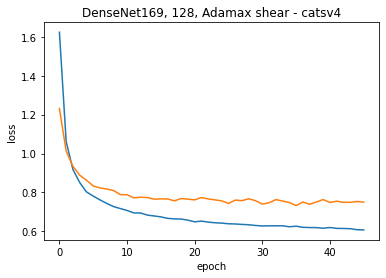

In [29]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den22)

In [30]:
pred_den22 = den22.predict(x=test_batches, steps=len(test_batches), verbose=1)

100/100 [==============================] - 27s 226ms/step


Confusion matrix, without normalization
[[89  1  1  1  1  0  0  0  5  2]
 [ 0 61  1  1  2  3  1  7 12 12]
 [ 1  1 98  0  0  0  0  0  0  0]
 [ 0  6  0 66 11 10  0  2  1  4]
 [ 1  2  0 13 72 11  0  1  0  0]
 [ 1  2  5  7 14 68  0  1  0  2]
 [ 0  3  2  0  3  0 87  4  0  1]
 [ 0  6  5  2  3  1  0 80  0  3]
 [ 4 10  0  0  1  0  0  2 81  2]
 [ 1  3  0  2  0  1  0  1  0 92]]


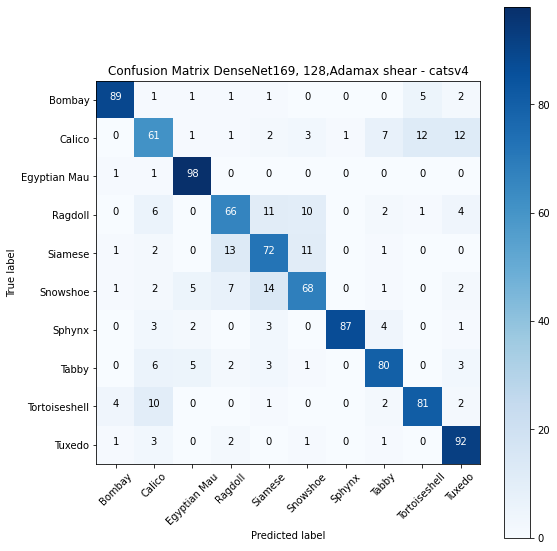

In [32]:
displayCM(y_true=test_batches.classes, predictions=pred_den22, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE},Adamax {augs} - catsv4')

***

***

In [33]:
augs = 'brightness'
BATCH_SIZE = 128

In [34]:
data_gen = ImageDataGenerator(brightness_range=[0.8,1.2],preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [35]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 12:27:22


In [36]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [37]:
cbks=[tb,es]

In [38]:
den23 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den23.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1664)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                16650     
Total params: 12,659,530
Trainable params: 16,650
Non-trainable params: 12,642,880
_________________________________________________________________


In [39]:
h_den23 = den23.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
146/146 [==============================] - 404s 3s/step - loss: 1.9197 - categorical_accuracy: 0.5699 - val_loss: 1.1392 - val_categorical_accuracy: 0.6590
Epoch 2/100
146/146 [==============================] - 318s 2s/step - loss: 1.0164 - categorical_accuracy: 0.6915 - val_loss: 0.9353 - val_categorical_accuracy: 0.7109
Epoch 3/100
146/146 [==============================] - 333s 2s/step - loss: 0.8578 - categorical_accuracy: 0.7286 - val_loss: 0.8535 - val_categorical_accuracy: 0.7402
Epoch 4/100
146/146 [==============================] - 368s 3s/step - loss: 0.7797 - categorical_accuracy: 0.7523 - val_loss: 0.8091 - val_categorical_accuracy: 0.7495
Epoch 5/100
146/146 [==============================] - 358s 2s/step - loss: 0.7376 - categorical_accuracy: 0.7616 - val_loss: 0.7879 - val_categorical_accuracy: 0.7529
Epoch 6/100
146/146 [==============================] - 356s 2s/step - loss: 0.7048 - categorical_accuracy: 0.7735 - val_loss: 0.7652 - val_categorical_accuracy:

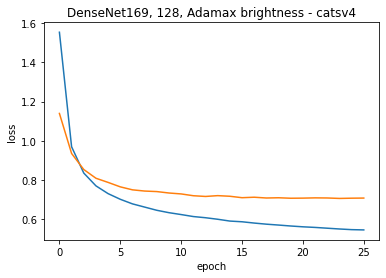

In [40]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den23)

In [41]:
pred_den23 = den23.predict(x=test_batches, steps=len(test_batches), verbose=1)

100/100 [==============================] - 21s 178ms/step


Confusion matrix, without normalization
[[89  1  1  1  1  0  0  0  6  1]
 [ 0 66  0  0  1  2  1  9 14  7]
 [ 1  0 98  0  0  0  0  1  0  0]
 [ 0  6  0 70  9  9  0  2  1  3]
 [ 1  3  0 19 65 10  0  2  0  0]
 [ 1  0  5  7 11 72  0  3  0  1]
 [ 0  3  1  0  3  0 86  5  0  2]
 [ 1  5  1  2  1  0  0 88  1  1]
 [ 3 11  0  0  0  0  0  3 83  0]
 [ 3  5  0  3  0  1  0  1  1 86]]


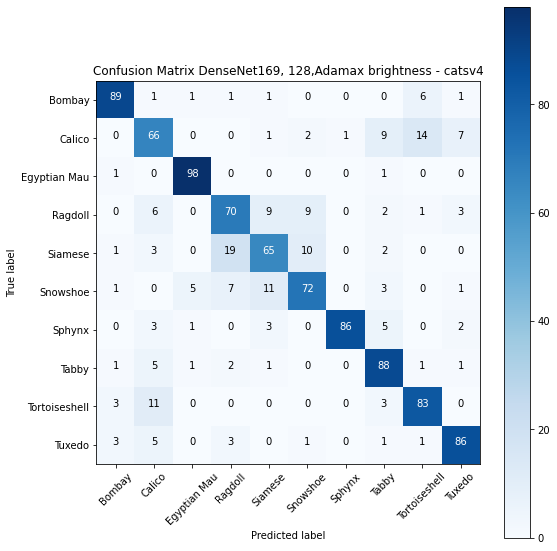

In [42]:
displayCM(y_true=test_batches.classes, predictions=pred_den23, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE},Adamax {augs} - catsv4')

***

***

### DenseNet169


In [43]:
augs = ''
BATCH_SIZE = 64

In [44]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [45]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 15:17:20


In [46]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [47]:
cbks=[tb,es]

In [48]:
den2_64 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den2_64.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1664)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                16650     
Total params: 12,659,530
Trainable params: 16,650
Non-trainable params: 12,642,880
_________________________________________________________________


In [49]:
h_den2_64 = den2_64.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 448s 2s/step - loss: 1.7793 - categorical_accuracy: 0.6143 - val_loss: 1.0070 - val_categorical_accuracy: 0.6949
Epoch 2/100
291/291 [==============================] - 348s 1s/step - loss: 0.9061 - categorical_accuracy: 0.7185 - val_loss: 0.8572 - val_categorical_accuracy: 0.7362
Epoch 3/100
291/291 [==============================] - 356s 1s/step - loss: 0.7771 - categorical_accuracy: 0.7551 - val_loss: 0.8011 - val_categorical_accuracy: 0.7489
Epoch 4/100
291/291 [==============================] - 394s 1s/step - loss: 0.7347 - categorical_accuracy: 0.7611 - val_loss: 0.7657 - val_categorical_accuracy: 0.7606
Epoch 5/100
291/291 [==============================] - 362s 1s/step - loss: 0.6808 - categorical_accuracy: 0.7802 - val_loss: 0.7549 - val_categorical_accuracy: 0.7612
Epoch 6/100
291/291 [==============================] - 327s 1s/step - loss: 0.6480 - categorical_accuracy: 0.7912 - val_loss: 0.7439 - val_categorical_accuracy:

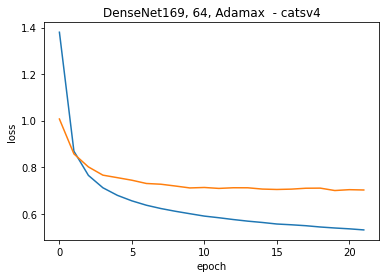

In [50]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den2_64)

In [51]:
pred_den2_64 = den2_64.predict(x=test_batches, steps=len(test_batches), verbose=1)

100/100 [==============================] - 21s 178ms/step


Confusion matrix, without normalization
[[86  1  1  1  1  0  0  1  7  2]
 [ 0 70  0  1  1  2  1  7 11  7]
 [ 1  0 97  0  0  1  0  1  0  0]
 [ 0  6  0 66 10 12  0  2  1  3]
 [ 1  3  0 15 73  7  0  1  0  0]
 [ 0  2  5  6 12 71  0  2  0  2]
 [ 0  3  3  0  3  0 86  4  0  1]
 [ 1  5  4  2  2  0  0 84  1  1]
 [ 2 11  0  0  1  0  0  3 82  1]
 [ 2  5  0  2  0  1  0  1  1 88]]


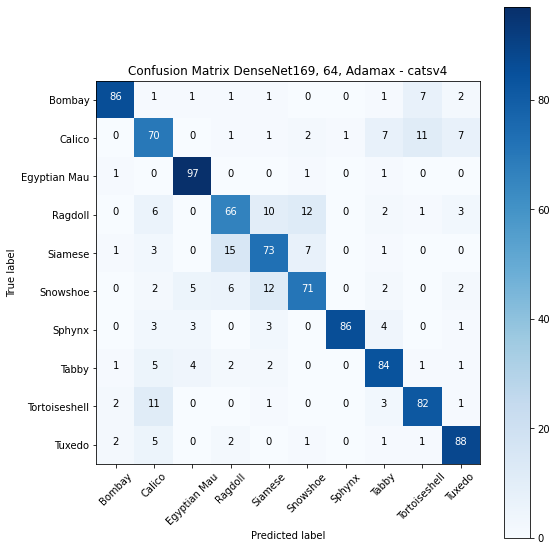

In [53]:
displayCM(y_true=test_batches.classes, predictions=pred_den2_64, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE}, Adamax {augs}- catsv4')

***

In [54]:
augs = 'time decay'
BATCH_SIZE = 64
initial_learning_rate = 0.01
epochs = 100
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)
clr = LearningRateScheduler(lr_time_based_decay, verbose=1)

In [55]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [56]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 17:39:38


In [57]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [58]:
cbks=[tb,es,clr]

In [59]:
den2_64 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den2_64.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1664)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                16650     
Total params: 12,659,530
Trainable params: 16,650
Non-trainable params: 12,642,880
_________________________________________________________________


In [60]:
h_den2_64 = den2_64.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
291/291 [==============================] - 519s 2s/step - loss: 1.8786 - categorical_accuracy: 0.5947 - val_loss: 1.0033 - val_categorical_accuracy: 0.6968
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009999000574917021.
291/291 [==============================] - 473s 2s/step - loss: 0.9163 - categorical_accuracy: 0.7199 - val_loss: 0.8380 - val_categorical_accuracy: 0.7374
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000999700106714659.
291/291 [==============================] - 356s 1s/step - loss: 0.7827 - categorical_accuracy: 0.7506 - val_loss: 0.7846 - val_categorical_accuracy: 0.7514
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009994003415259673.
291/291 [==============================] - 345s 1s/step - loss: 0.7049 - categorical_accuracy: 0.7743 - val_loss: 0.7510 - val_categorical_accura

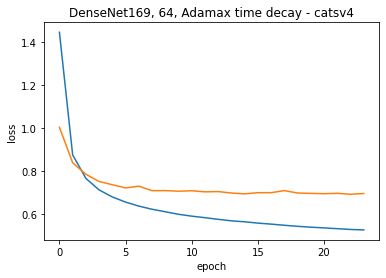

In [61]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den2_64)

In [62]:
pred_den2_64 = den2_64.predict(x=test_batches, steps=len(test_batches), verbose=1)

100/100 [==============================] - 106s 805ms/step


Confusion matrix, without normalization
[[86  1  1  1  1  0  0  1  6  3]
 [ 0 64  1  0  2  2  1  8 14  8]
 [ 1  1 98  0  0  0  0  0  0  0]
 [ 0  5  0 68 10  9  0  2  2  4]
 [ 1  2  1 14 71  9  0  1  1  0]
 [ 1  1  6  6 11 69  0  3  1  2]
 [ 0  3  2  1  3  0 86  3  0  2]
 [ 1  5  4  2  2  0  0 83  2  1]
 [ 2  8  0  0  0  0  0  2 86  2]
 [ 1  3  0  1  0  0  0  1  1 93]]


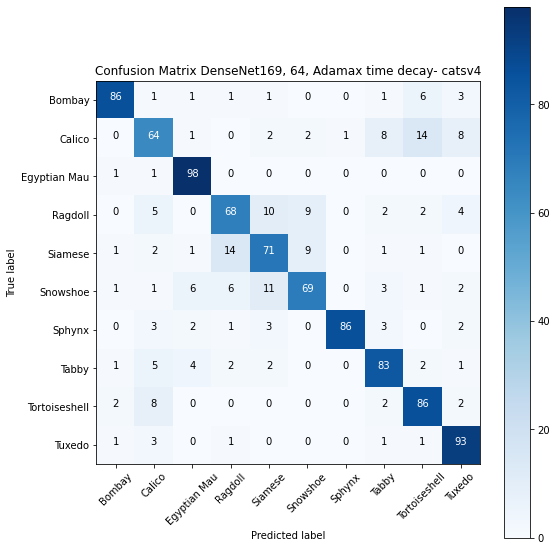

In [63]:
displayCM(y_true=test_batches.classes, predictions=pred_den2_64, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE}, Adamax {augs}- catsv4')

***

In [64]:
augs = 'step decay'
BATCH_SIZE = 64
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
clr22 = LearningRateScheduler(lr_step_decay, verbose=1)

In [65]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [66]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 20:58:54


In [67]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [68]:
cbks=[tb,es,clr22]

In [69]:
den21_64 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den21_64.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1664)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                16650     
Total params: 12,659,530
Trainable params: 16,650
Non-trainable params: 12,642,880
_________________________________________________________________


In [70]:
h_den21_64 = den21_64.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
291/291 [==============================] - 873s 3s/step - loss: 1.2588 - categorical_accuracy: 0.6957 - val_loss: 0.9281 - val_categorical_accuracy: 0.6936
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
291/291 [==============================] - 921s 3s/step - loss: 0.8099 - categorical_accuracy: 0.7292 - val_loss: 0.8568 - val_categorical_accuracy: 0.7187
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
291/291 [==============================] - 909s 3s/step - loss: 0.7673 - categorical_accuracy: 0.7433 - val_loss: 0.8342 - val_categorical_accuracy: 0.7330
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
291/291 [==============================] - 910s 3s/step - loss: 0.7491 - categorical_accuracy: 0.7522 - val_loss: 0.9020 - val_categorical_accuracy: 0.7125
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing

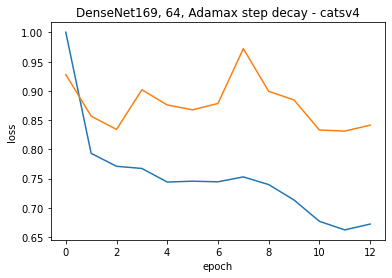

In [71]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den21_64)

In [72]:
pred_den21_64 = den21_64.predict(x=test_batches, steps=len(test_batches), verbose=1)

100/100 [==============================] - 29s 250ms/step


Confusion matrix, without normalization
[[83  1  3  1  1  0  0  3  5  3]
 [ 0 66  1  2  3  3  0  9 10  6]
 [ 1  0 99  0  0  0  0  0  0  0]
 [ 0  5  1 66 17  5  0  3  1  2]
 [ 1  2  1  9 79  7  0  1  0  0]
 [ 0  1 10 11 27 47  0  1  0  3]
 [ 0  6  4  0 12  0 75  3  0  0]
 [ 1  5  3  2  3  0  0 85  0  1]
 [ 4 10  1  1  1  0  0  5 77  1]
 [ 1  4  1  3  0  0  0  2  0 89]]


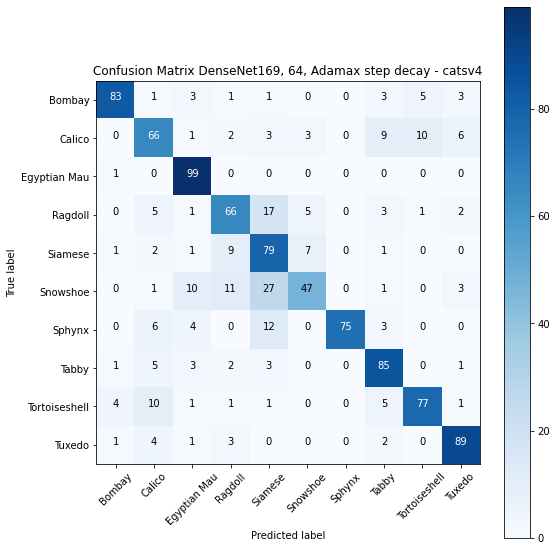

In [73]:
displayCM(y_true=test_batches.classes, predictions=pred_den21_64, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4')

***

In [ ]:
augs = 'shear'
BATCH_SIZE = 64

In [ ]:
data_gen = ImageDataGenerator(shear_range=40,preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

In [ ]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

In [ ]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [ ]:
cbks=[tb,es]

In [ ]:
den22_64 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den22_64.summary()

In [ ]:
h_den22_64 = den22_64.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

In [ ]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den22_64)

In [ ]:
pred_den22_64 = den22_64.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den22_64, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE},Adamax {augs} - catsv4')

***

***

In [ ]:
augs = 'brightness'
BATCH_SIZE = 64

In [ ]:
data_gen = ImageDataGenerator(brightness_range=[0.8,1.2],preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

In [ ]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

In [ ]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [ ]:
cbks=[tb,es]

In [ ]:
den23_64 = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den23_64.summary()

In [ ]:
h_den23_64 = den23_64.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

In [ ]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adamax {augs} - catsv4', h_den23_64)

In [ ]:
pred_den23_64 = den23_64.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den23_64, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE},Adamax {augs} - catsv4')

***

In [ ]:
optimizer2 = keras.optimizers.Adam()

In [ ]:
augs = ''
BATCH_SIZE = 64

In [ ]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=BATCH_SIZE, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

In [ ]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

In [ ]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [ ]:
cbks=[tb,es]

In [ ]:
den2_64_adam = create_model_DenseNet169(number_classes=no_classes, optimizer=optimizer2, metrics=metrics)
den2_64_adam.summary()

In [ ]:
h_den2_64_adam = den2_64_adam.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

In [ ]:
plotLoss(f'DenseNet169, {BATCH_SIZE}, Adam {augs} - catsv4', h_den2_64_adam)

In [ ]:
pred_den2_64_adam = den2_64_adam.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den2_64_adam, plot_labels=breeds, title=f'Confusion Matrix DenseNet169, {BATCH_SIZE}, Adam {augs}- catsv4')

***

### DenseNet201


In [ ]:
augs = ''

In [19]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den3 = create_model_DenseNet201(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den3 = den3.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet201, 128batch, Adamax {augs} - catsv4', h_den3)

In [ ]:
pred_den3 = den3.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den3, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128batch, Adamax {augs} - catsv4')

***

In [ ]:
augs = 'rotation flip'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den31 = create_model_DenseNet201(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den31.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den31 = den31.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet201, 128batch, Adamax {augs} - catsv4', h_den31)

In [ ]:
pred_den31 = den31.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den31, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b, Adamax {augs} - catsv4')

***

In [ ]:
augs = 'rotation flip shear'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,shear_range=40,preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den32 = create_model_DenseNet201(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den32.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den32 = den32.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet201, 128batch, Adamax {augs} - catsv4', h_den32)

In [ ]:
pred_den32 = den32.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den32, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b,Adamax {augs} - catsv4')

***

In [ ]:
augs = 'rotation flip brightness'

In [19]:
data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=90,,brightness_range=[0.8,1.2],preprocessing_function=tf.keras.applications.densenet.preprocess_input, validation_split=0.3)
train_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="training") 
valid_batches = data_gen.flow_from_directory(directory=train_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=128, subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_dir, target_size=(INPUT_SIZE,INPUT_SIZE), classes=breeds, batch_size=10, shuffle=False)

Found 18584 images belonging to 10 classes.
Found 7956 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
log_dir=os.path.join('logs','fitden',curTime().strftime("%Y%m%d-%H%M%S"))

Current Time = 23:06:21


In [21]:
tb =  TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')

In [22]:
cbks=[tb,es]

In [23]:
den33 = create_model_DenseNet201(number_classes=no_classes, optimizer=optimizer, metrics=metrics)
den33.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
Total params: 84,957,148
Trainable params: 40,330
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
h_den33 = den33.fit(train_batches,epochs=100, callbacks=cbks,validation_data=valid_batches)

Epoch 1/100
291/291 [==============================] - 900s 3s/step - loss: 1.3529 - categorical_accuracy: 0.5631 - val_loss: 0.9576 - val_categorical_accuracy: 0.6948
Epoch 2/100
291/291 [==============================] - 817s 3s/step - loss: 0.8710 - categorical_accuracy: 0.7184 - val_loss: 0.8685 - val_categorical_accuracy: 0.7212
Epoch 3/100
231/291 [======================>.......] - ETA: 1:54 - loss: 0.7801 - categorical_accuracy: 0.7475

In [ ]:
plotLoss(f'DenseNet201, 128batch, Adamax {augs} - catsv4', h_den33)

In [ ]:
pred_den33 = den33.predict(x=test_batches, steps=len(test_batches), verbose=1)

In [ ]:
displayCM(y_true=test_batches.classes, predictions=pred_den33, plot_labels=cm_plot_labels, title=f'Confusion Matrix DenseNet121, 128b,Adamax {augs} - catsv4')

***